In [2]:
#> --- Imports ---

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from IPython.display import Image, display

In [22]:
#> --- Reading CSV file ---

data_frame = pd.read_csv(r'data\raw\Breast_Cancer_Wisconsin_(Diagnostic).csv')
index_list=[i for i in range(1,len(data_frame)+1)]
data_frame.index=index_list
raw_data_amount=len(data_frame)

print(f"DataFrame has {len(data_frame)} rows.")
data_frame.iloc[:8] #> Showing some part of te dataframe

DataFrame has 569 rows.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
7,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [23]:
#> --- Data Cleaning ---

# --- Fixing Y Values ---
data_frame['diagnosis'] = data_frame['diagnosis'].map({'M': 1, 'B': 0})
print(f"There is {len(data_frame[data_frame['diagnosis']==0])} Benign and {len(data_frame[data_frame['diagnosis']==1])} Malignant")

# --- Cleaning Up ---
try:
    del data_frame['id']
except:
    pass

# --- Checking if Data needs fixing ---
if len(data_frame)== len(data_frame.dropna()):
    print('There is no "NaN" or missing-value in the Dataset')

data_frame.iloc[:8] #> Showing some part of te dataframe

There is 357 Benign and 212 Malignant
There is no "NaN" or missing-value in the Dataset


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
7,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


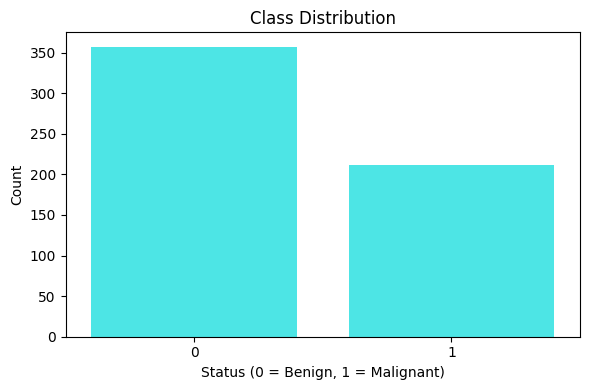

In [21]:
#> --- Class Balance Visualization ---
# -------------------------------
df=data_frame.copy()
plt.figure(figsize=(6,4))
sns.countplot(x=df["diagnosis"], color="aqua", alpha=0.8)
plt.title("Class Distribution")
plt.xlabel("Status (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(r"\results\figures\class_distribution.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
# -------------------------------

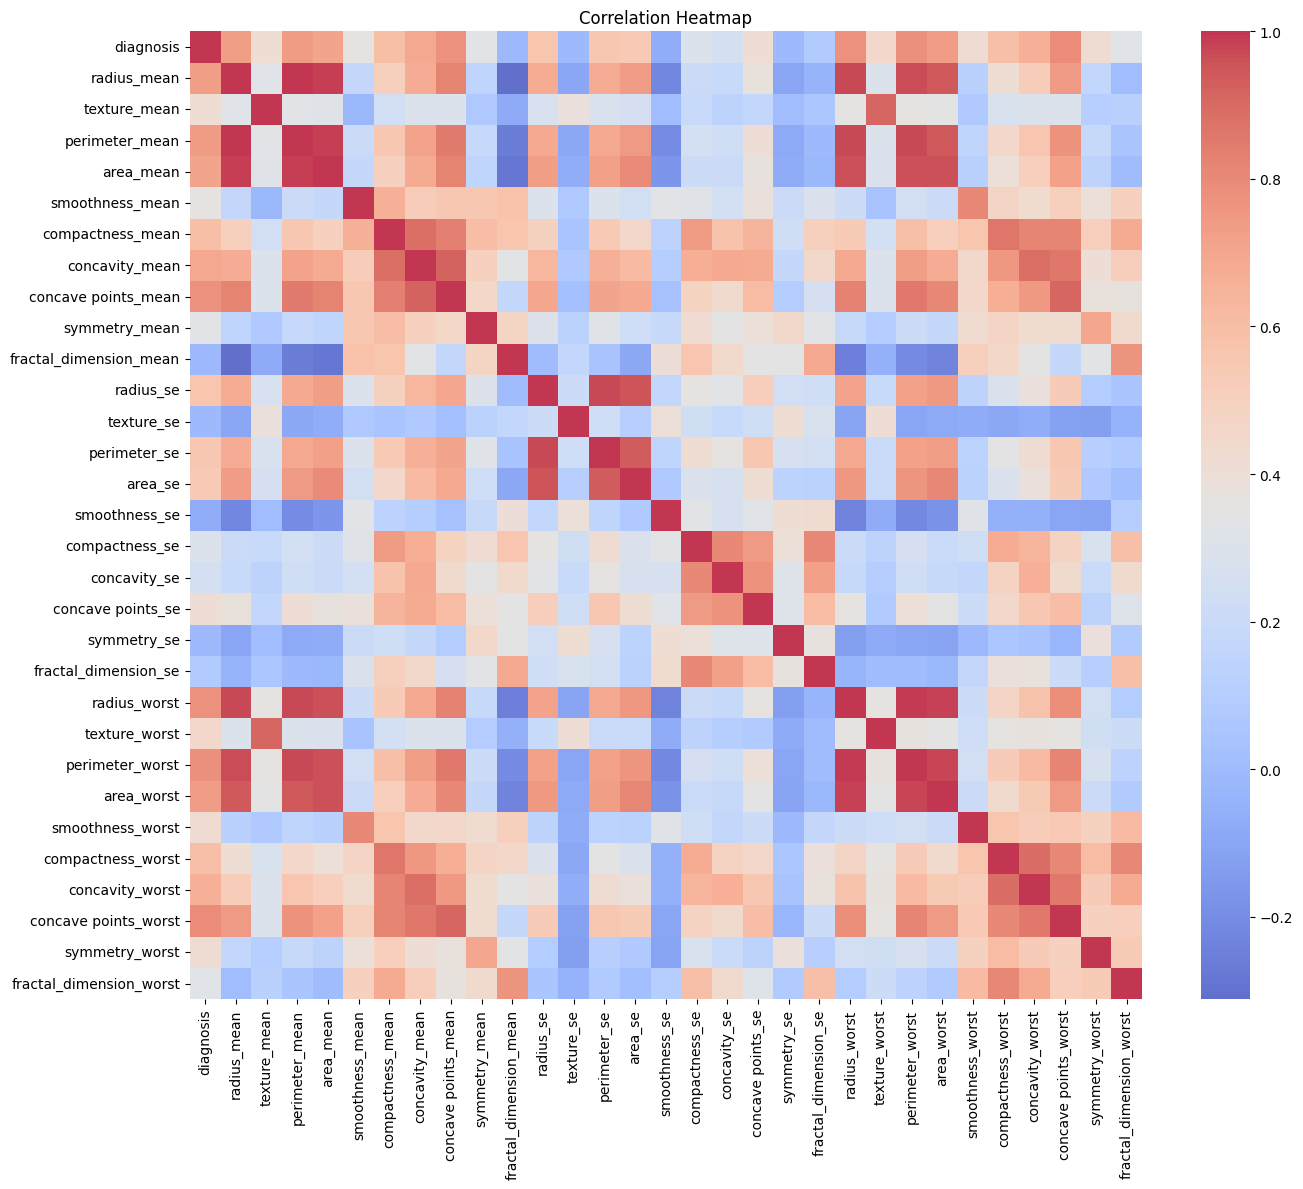

In [6]:
#> --- Correlation Heatmap ---
# -------------------------------
plt.figure(figsize=(14, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False, alpha=0.8)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(r"\results\figures\correlation_heatmap.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
# -------------------------------

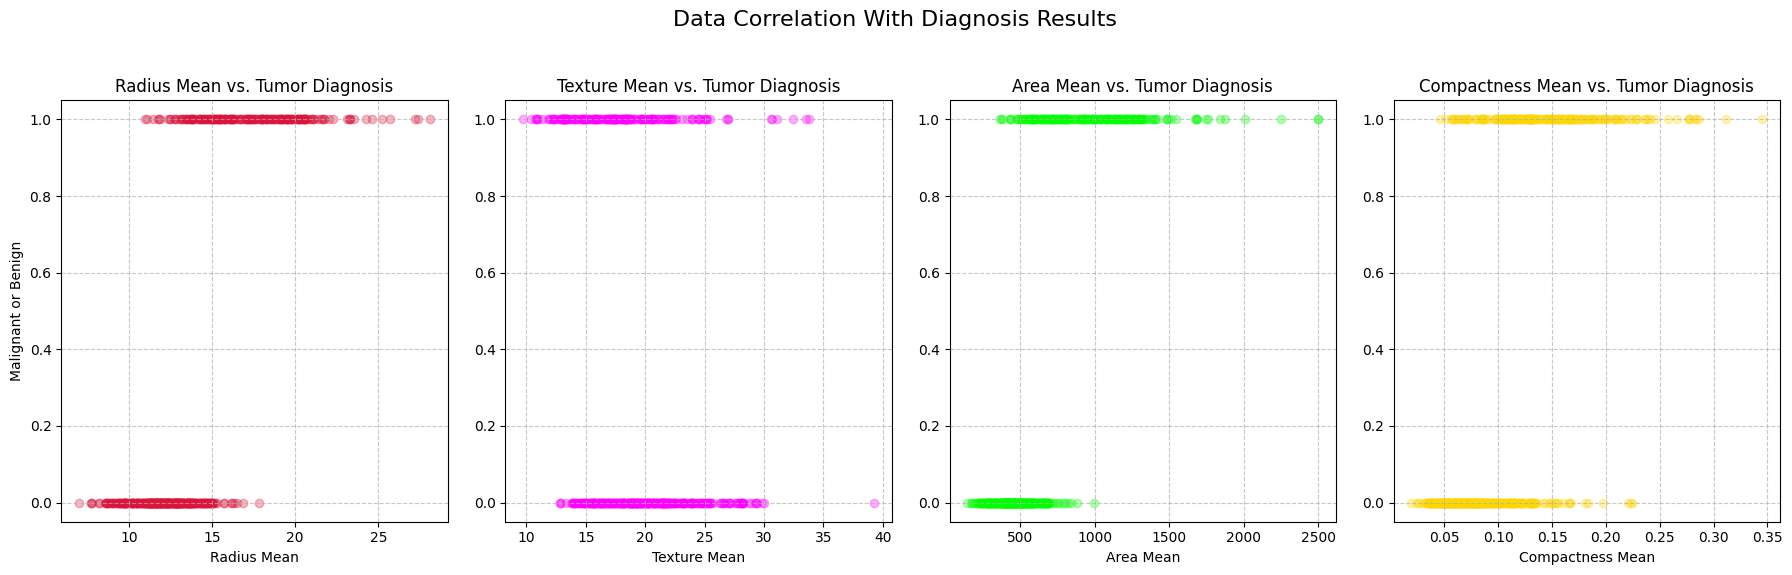

In [7]:
#> --- Data Correlation With Diagnosis Results (1) ---

# 1. Create a figure and a set of subplots (1 row, 2 columns)
# figsize sets the total size of the figure for better visibility
fig, ax = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('Data Correlation With Diagnosis Results', fontsize=16)
plot_data_frame=data_frame.copy()

ax[0].scatter(plot_data_frame['radius_mean'], plot_data_frame['diagnosis'], alpha=0.3, color="crimson")
ax[0].set_xlabel('Radius Mean')
ax[0].set_ylabel('Malignant or Benign')
ax[0].set_title('Radius Mean vs. Tumor Diagnosis')
ax[0].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 1: Price vs. Distance ---
# ax[0] refers to the first (left) plot
ax[1].scatter(plot_data_frame['texture_mean'].sort_values(), plot_data_frame['diagnosis'], color='fuchsia', alpha=0.3)
ax[1].set_title('Texture Mean vs. Tumor Diagnosis')
ax[1].set_xlabel('Texture Mean')
ax[1].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 2: Price vs. Pickup Time ---
# ax[1] refers to the second (right) plot
ax[2].scatter(plot_data_frame['area_mean'], plot_data_frame['diagnosis'], color='lime', alpha=0.3)
ax[2].set_title('Area Mean vs. Tumor Diagnosis')
ax[2].set_xlabel('Area Mean')
ax[2].grid(True, linestyle='--', alpha=0.7)


ax[3].scatter(plot_data_frame['compactness_mean'], plot_data_frame['diagnosis'], color='gold', alpha=0.3)
ax[3].set_title('Compactness Mean vs. Tumor Diagnosis')
ax[3].set_xlabel('Compactness Mean')
ax[3].grid(True, linestyle='--', alpha=0.7)


# 2. Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)

# 3. Display or save the plot
# plt.show() # Use this in an interactive environment
plt.savefig(r"\results\figures\data_correlation_with_diagnosis_results_1.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del plot_data_frame

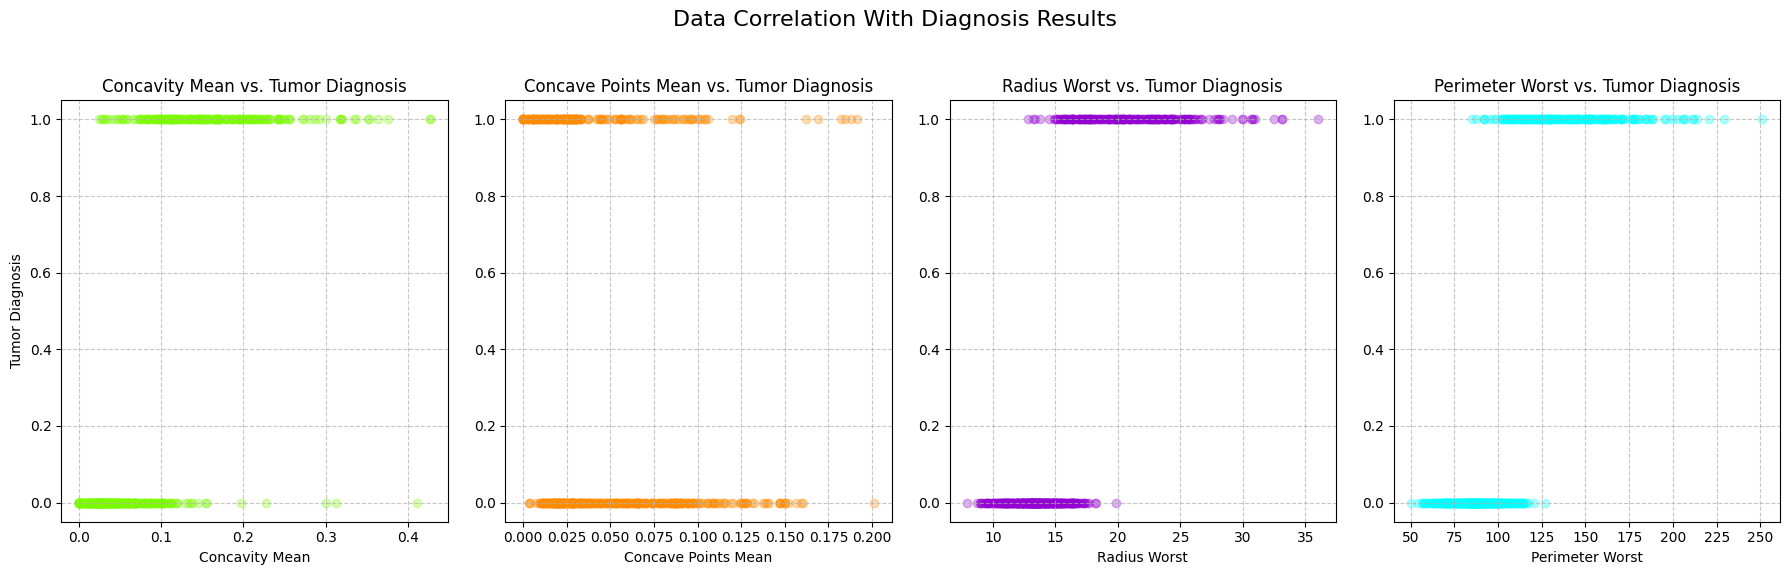

In [8]:
#> --- Data Correlation With Diagnosis Results (2) ---

# 1. Create a figure and a set of subplots (1 row, 2 columns)
# figsize sets the total size of the figure for better visibility
fig, ax = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('Data Correlation With Diagnosis Results', fontsize=16)
plot_data_frame=data_frame.copy()

ax[0].scatter(plot_data_frame['concavity_mean'], plot_data_frame['diagnosis'], alpha=0.3, color="lawngreen")
ax[0].set_title('Concavity Mean vs. Tumor Diagnosis')
ax[0].set_xlabel('Concavity Mean')
ax[0].set_ylabel('Tumor Diagnosis')
ax[0].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 1: Price vs. Distance ---
# ax[0] refers to the first (left) plot
ax[1].scatter(plot_data_frame['concave points_mean'].sort_values(), plot_data_frame['diagnosis'], color='darkorange', alpha=0.3)
ax[1].set_title('Concave Points Mean vs. Tumor Diagnosis')
ax[1].set_xlabel('Concave Points Mean')
ax[1].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 2: Price vs. Pickup Time ---
# ax[1] refers to the second (right) plot
ax[2].scatter(plot_data_frame['radius_worst'], plot_data_frame['diagnosis'], color='darkviolet', alpha=0.3)
ax[2].set_title('Radius Worst vs. Tumor Diagnosis')
ax[2].set_xlabel('Radius Worst')
ax[2].grid(True, linestyle='--', alpha=0.7)


ax[3].scatter(plot_data_frame['perimeter_worst'], plot_data_frame['diagnosis'], color='cyan', alpha=0.3)
ax[3].set_title('Perimeter Worst vs. Tumor Diagnosis')
ax[3].set_xlabel('Perimeter Worst')
ax[3].grid(True, linestyle='--', alpha=0.7)


# 2. Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)

# 3. Display or save the plot
# plt.show() # Use this in an interactive environment
plt.savefig(r"\results\figures\data_correlation_with_diagnosis_results_2.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del plot_data_frame

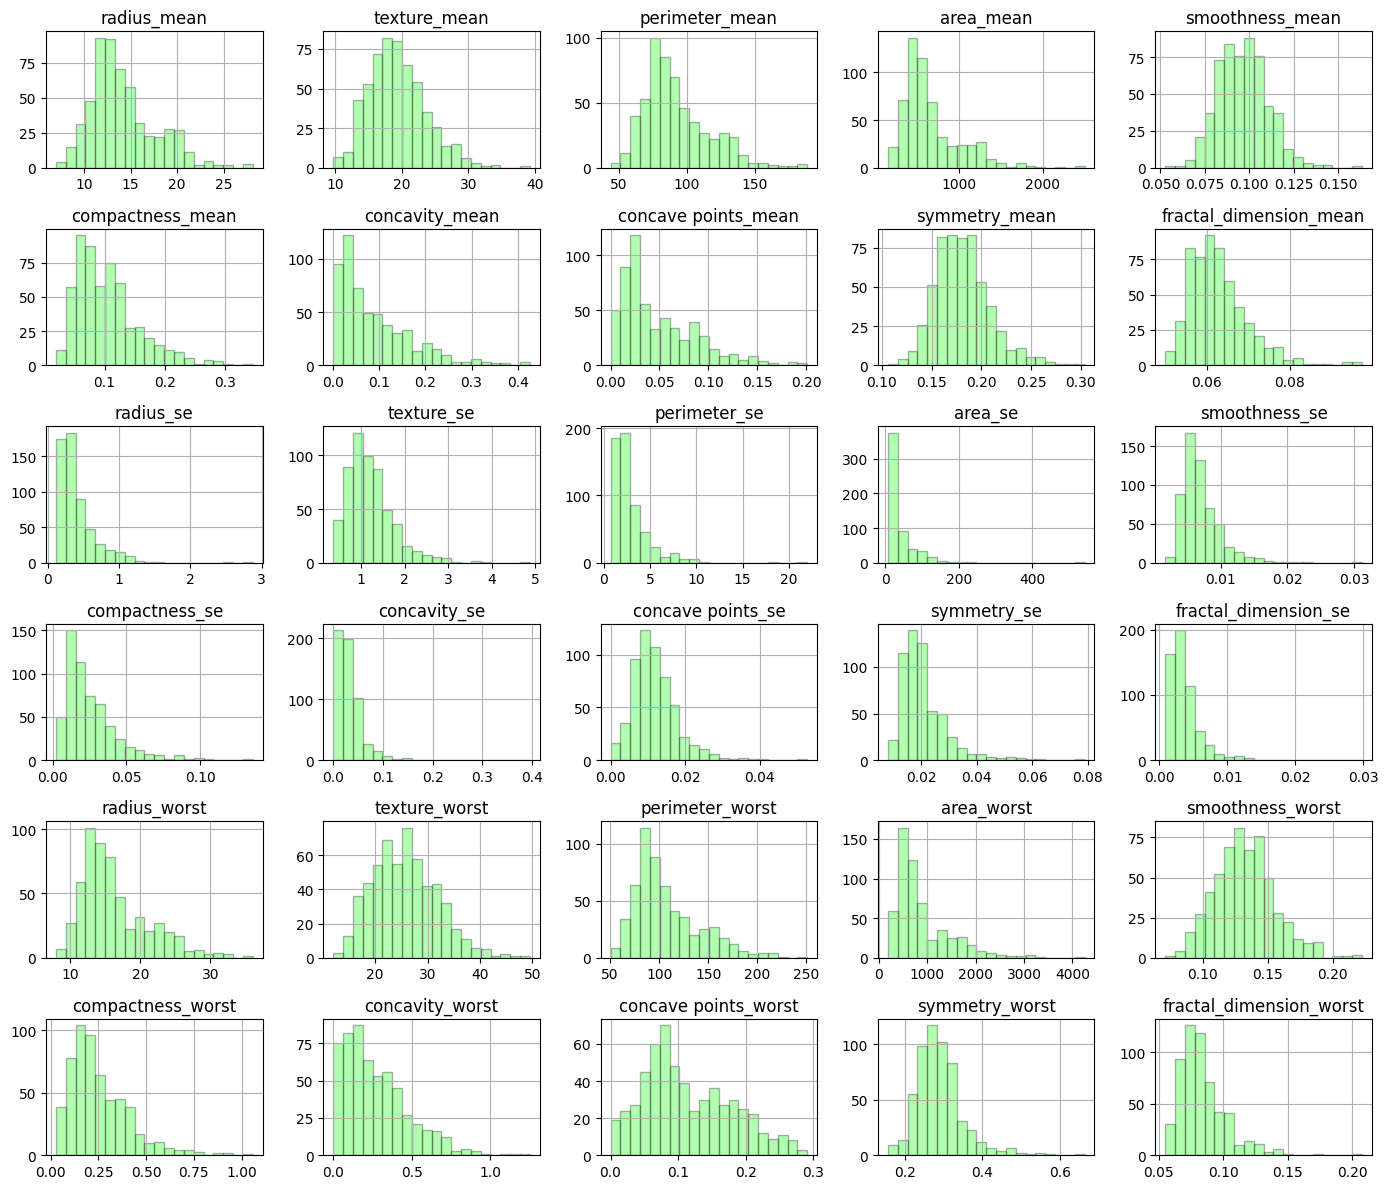

In [9]:
#> --- Feature Distributions (Heavy) ---
# -------------------------------
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = [c for c in numeric_cols if c not in ["diagnosis"]]

df[numeric_cols].hist(figsize=(14, 12), bins=20, edgecolor="black", color="lime", alpha=0.3)
plt.tight_layout()
plt.savefig(r"\results\figures\feature_distributions.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
# -------------------------------

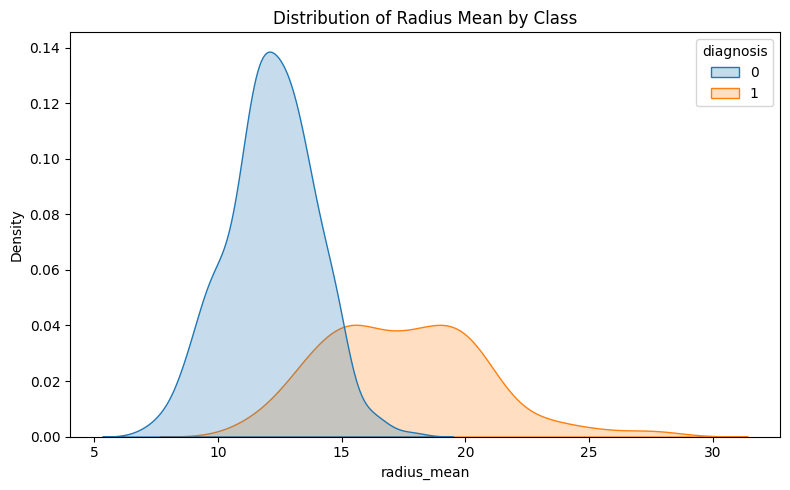

In [10]:
#> --- Distribution Split by Class ---
# -------------------------------
feature = "radius_mean"  # pick any numeric column

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x=feature, hue="diagnosis", fill=True)
plt.title(f"Distribution of Radius Mean by Class")
plt.tight_layout()
plt.savefig(r"\results\figures\distribution_of_radius_mean_by_class.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
# -------------------------------

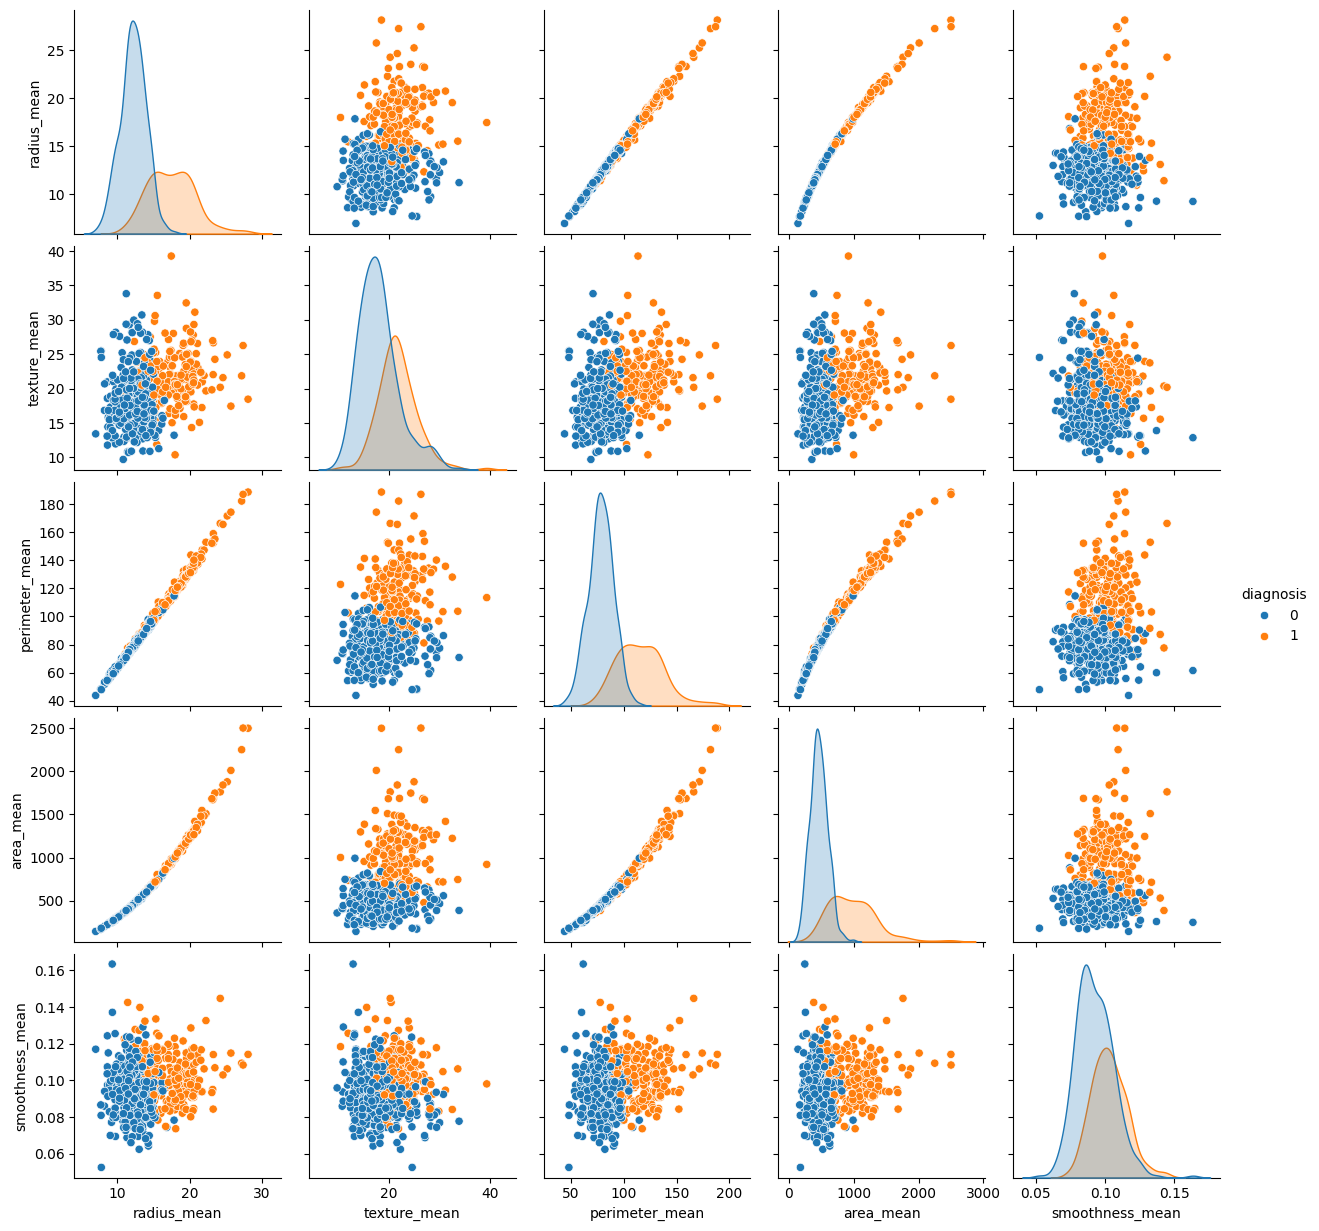

In [11]:
#> --- Pairplot (Heavy) ---
# -------------------------------
sns.pairplot(df[numeric_cols[:5] + ["diagnosis"]], hue="diagnosis")
plt.savefig(r"\results\figures\pairplot.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
# -------------------------------

In [12]:
#> --- Process Functions ---
#> ---------------------------------------------------------------------------------------   

def InputValidation(x_array, y_array):
    
    # --- Attempt Conversion ---
    if not isinstance(x_array, np.ndarray):
        try:
            x_array = np.asarray(x_array)
        except Exception:
            raise TypeError(f'Could not convert input of type "{type(x_array)}" to "numpy.array".')
    if not isinstance(y_array, np.ndarray):
        try:
            y_array = np.asarray(y_array)
        except Exception:
            raise TypeError(f'Could not convert input of type "{type(y_array)}" to "numpy.array".')
    # --- Flattening inputs and Returning ---
    return x_array.ravel(), y_array.ravel()

#> ---------------------------------------------------------------------------------------   

def NoneNumericalSorter(x_array, y_array, true_y_value='1', false_y_value='0'):

    # --- Replacing y_array Values ---
    if false_y_value!='0' or true_y_value!='1':
        y_array[y_array==true_y_value]='1'
        y_array[y_array==false_y_value]='0'
    # --- Unique Values and Empty Sorted Values ---
    unique_x_array = np.unique(x_array)
    sorted_unique_x_dict={}
    # --- Process ---
    summed_y_on_unique_x=pd.crosstab(x_array, y_array)
    for i in unique_x_array:
        x_and_y_criteria=summed_y_on_unique_x.loc[i,1]
        x_criteria=summed_y_on_unique_x.loc[i,1]+summed_y_on_unique_x.loc[i,0]
        score=x_and_y_criteria/x_criteria
        sorted_unique_x_dict[i]=score
    sorted_unique_x_dict = dict(sorted(sorted_unique_x_dict.items(), key=lambda item: item[1]))   
    # --- Returning ---
    return unique_x_array, sorted_unique_x_dict

#> ---------------------------------------------------------------------------------------   

# def BestNoneNumericalGini(x_array, y_array, true_y_value='1', false_y_value='0'):
    
#     # --- Input validation ---
#     x_array, y_array=InputValidation(x_array, y_array)
    
#     #--- Sorting Values ---
#     unique_x_array, sorted_unique_x_dict = NoneNumericalSorter(x_array, y_array, true_y_value, false_y_value)
    
#     # --- Calculating best Gini ---
#     summed_y_on_unique_x=pd.crosstab(x_array, y_array)

#     best_gini=("","",5)
#     left_values=[]
#     for i in sorted_unique_x_dict.keys():
#         left_values.append(i)
#         right_values=unique_x_array[~np.isin(unique_x_array, left_values)]
        
#         # --- Break Rule ---
#         if len(unique_x_array[~np.isin(unique_x_array, left_values)])<1:
#             break

#         # --- Left Counts ---
#         left_yes = summed_y_on_unique_x.loc[left_values,1].sum()
#         left_no = summed_y_on_unique_x.loc[left_values,0].sum()
#         # --- Right Counts ---
#         right_yes = summed_y_on_unique_x.loc[right_values,1].sum()
#         right_no = summed_y_on_unique_x.loc[right_values,0].sum()
        
#         # --- Gini Impurity ---
#         total=left_no+left_yes+right_no+right_yes
#         total_left, total_right = left_no+left_yes, right_no+right_yes

#         # --- Catching 0 ---
#         try:
#             left_gini_impurity= 1 - (left_yes/(left_yes+left_no))**2 - (left_no/(left_yes+left_no))**2
#         except ZeroDivisionError:
#             left_gini_impurity=0
            
#         try:
#             right_gini_impurity= 1- (right_yes/(right_yes+right_no))**2 - (right_no/(right_yes+right_no))**2
#         except ZeroDivisionError:
#             right_gini_impurity=0

#         # --- Calculating Total Gini ---    
#         total_gini_impurity = (total_left/total)*left_gini_impurity + (total_right/total)*right_gini_impurity

#         # --- Replacing Best Gini ---    
#         if total_gini_impurity<best_gini[2]:
#             best_gini=(f"Best Gini-Impurity for {left_values} in left node and {right_values} at right.", (left_values, right_values), total_gini_impurity)
            
#     return best_gini

#> ---------------------------------------------------------------------------------------      

def BestNoneNumericalGini(x_array, y_array, true_y_value='1', false_y_value='0'):
    x_array, y_array = InputValidation(x_array, y_array)
    # --- Convert y to 0/1 ---
    y = np.where(y_array == true_y_value, 1, 0)
    # --- Deining the Answer Format ---
    unique_vals = np.unique(x_array)
    best = ("", None, float('inf'))
    # --- For categorical: try every subset ordering ---
    for val in unique_vals:
        left_mask = x_array == val
        right_mask = ~left_mask
        # --- Left and Right Values ---
        left_y = y[left_mask]
        right_y = y[right_mask]
        # --- Breaking Rule ---
        if len(left_y) == 0 or len(right_y) == 0:
            continue
        # --- Process ---
        n_left = len(left_y)
        n_right = len(right_y)
        total = n_left + n_right
        # --- left ---
        p1_left = left_y.mean()
        gini_left = 1 - p1_left**2 - (1 - p1_left)**2
        # --- Right ---
        p1_right = right_y.mean()
        gini_right = 1 - p1_right**2 - (1 - p1_right)**2
        # --- Total Gini ---
        total_gini = (n_left/total)*gini_left + (n_right/total)*gini_right
        # --- Replacing Criteria ---
        if total_gini < best[2]:
            best = (f"Best split: left={val}, right=others", (val,), total_gini)
    # --- Return ---
    return best

#> ---------------------------------------------------------------------------------------      

def NumericalSorter(x_array, y_array, true_y_value=1, false_y_value=0):
    
    # --- Replacing y_array Values ---
    if false_y_value!=0 or true_y_value!=1:
        y_array[y_array==true_y_value]=1
        y_array[y_array==false_y_value]=0
    # --- Processing ---
    temp_df=pd.DataFrame({"X":x_array,"Y":y_array})
    temp_df=temp_df.drop_duplicates()
    temp_df=temp_df.sort_values("X")
    unique_x_array=((temp_df["X"].to_numpy()).ravel()).astype(int)
    unique_y_array=((temp_df["Y"].to_numpy()).ravel()).astype(int)
    xy_array=np.column_stack((unique_x_array, unique_y_array))
    # --- return ---
    return xy_array, unique_x_array, unique_y_array, x_array.astype(int), y_array.astype(int)

#> ---------------------------------------------------------------------------------------   

# def BestNumericalGini(x_array, y_array, true_y_value=1, false_y_value=0):
#     # --- Input validation ---
#     x_array, y_array = InputValidation(x_array, y_array)

#     #--- Sorting Values ---
#     xy_array, unique_x_array, unique_y_array, x_array, y_array = NumericalSorter(x_array, y_array, true_y_value, false_y_value)
#     summed_y_on_unique_x=pd.crosstab(x_array, y_array)
    
#     best_gini=("","",5)
#     x_loop_array=np.unique(xy_array[:,0])

#     for index_count in range(len(x_loop_array) - 1):
        
#         average=(x_loop_array[index_count]+x_loop_array[index_count+1])/2
#         left_criteria=x_loop_array[x_loop_array<=average]
#         right_criteria=x_loop_array[x_loop_array>average]
        
#         # --- Left Counts ---
#         left_yes = summed_y_on_unique_x.loc[left_criteria,1].sum()
#         left_no = summed_y_on_unique_x.loc[left_criteria,0].sum()
#         # --- Right Counts ---
#         right_yes = summed_y_on_unique_x.loc[right_criteria,1].sum()
#         right_no = summed_y_on_unique_x.loc[right_criteria,0].sum()
        
#         # --- Gini Impurity ---
#         total=left_no+left_yes+right_no+right_yes
#         total_left, total_right = left_no+left_yes, right_no+right_yes

#         # --- Catching 0 ---
#         try:
#             left_gini_impurity= 1 - (left_yes/(left_yes+left_no))**2 - (left_no/(left_yes+left_no))**2
#         except ZeroDivisionError:
#             left_gini_impurity=0
            
#         try:
#             right_gini_impurity= 1- (right_yes/(right_yes+right_no))**2 - (right_no/(right_yes+right_no))**2
#         except ZeroDivisionError:
#             right_gini_impurity=0

#         # --- Calculating Total Gini ---    
#         total_gini_impurity= (total_left/total)*left_gini_impurity + (total_right/total)*right_gini_impurity

#         # --- Replacing Best Gini ---    
#         if total_gini_impurity<best_gini[2]:
#             best_gini=(f"Best Gini-Impurity for {average} as average.", average, total_gini_impurity)
            
#     return best_gini

#> ---------------------------------------------------------------------------------------

def BestNumericalGini(x_array, y_array, true_y_value=1, false_y_value=0):
    x_array, y_array = InputValidation(x_array, y_array)
    # Ensure y is numerical 0/1 cleanly
    y = np.where(y_array == true_y_value, 1, 0)
    # Sort unique values
    unique_vals = np.unique(x_array.astype(float))
    unique_vals.sort()
    # --- Defining The Answer Format ---
    best = ("", None, float('inf'))
    # Possible thresholds are midpoints between sorted values
    thresholds = [(unique_vals[i] + unique_vals[i+1]) / 2 for i in range(len(unique_vals)-1)]
    # --- Iterations ---
    for thr in thresholds:
        # --- The Process ---
        left_mask = x_array <= thr
        right_mask = ~left_mask
        left_y = y[left_mask]
        right_y = y[right_mask]
        # --- Skip impossible splits ---
        if len(left_y) == 0 or len(right_y) == 0:
            continue
        # --- The process ---
        n_left = len(left_y)
        n_right = len(right_y)
        total = n_left + n_right
        # --- Left Gini ---
        p1_left = left_y.mean()
        gini_left = 1 - p1_left**2 - (1 - p1_left)**2
        # --- Right Gini ---
        p1_right = right_y.mean()
        gini_right = 1 - p1_right**2 - (1 - p1_right)**2
        # --- Weighted Gini ---
        total_gini = (n_left/total)*gini_left + (n_right/total)*gini_right
        # --- Replacing Criteria ---
        if total_gini < best[2]:
            best = (f"Best split at {thr}", thr, total_gini)
    # --- Return ---
    return best
    
#> ---------------------------------------------------------------------------------------

def IsNumerical(x_array, max_unique=10):
    if not np.issubdtype(x_array.dtype, np.number):
        return False
    return np.unique(x_array).size > max_unique

#> ---------------------------------------------------------------------------------------

def train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None):
    X = np.asarray(X)
    y = np.asarray(y)
    # --- Checking for same length ---
    if len(X) != len(y):
        raise ValueError("X and y must have the same number of samples")
    # --- Calculating Test-Array Size ---
    n_samples = len(X)
    test_size = int(n_samples * test_size)
    indices = np.arange(n_samples)
    # --- If Shuffle is True ---
    if shuffle:
        rng = np.random.default_rng(random_state)
        rng.shuffle(indices)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    # Making the Final Arrays Ready ---
    X_train = X[train_idx]
    X_test  = X[test_idx]
    y_train = y[train_idx]
    y_test  = y[test_idx]
    # --- Return ---
    return X_train, X_test, y_train, y_test
    
#> ---------------------------------------------------------------------------------------

def accuracy(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    # --- Return ---
    return np.mean(y_true == y_pred)
    
#> ---------------------------------------------------------------------------------------

def confusion_matrix(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    classes = np.unique(np.concatenate([y_true, y_pred]))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    class_to_index = {c: i for i, c in enumerate(classes)}
    # --- Iteration ---
    for yt, yp in zip(y_true, y_pred):
        i = class_to_index[yt]
        j = class_to_index[yp]
        matrix[i, j] += 1
    # --- Returning ---
    return matrix, classes
    
#> ---------------------------------------------------------------------------------------

def precision_recall_f1(y_true, y_pred, positive=1):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    # --- Summing Claused Arrays ---
    tp = np.sum((y_true == positive) & (y_pred == positive))
    fp = np.sum((y_true != positive) & (y_pred == positive))
    fn = np.sum((y_true == positive) & (y_pred != positive))
    # --- Process ---
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    # --- Returning ---
    return precision, recall, f1

#> ---------------------------------------------------------------------------------------

def evaluate_model(y_true, y_pred):
    acc = accuracy(y_true, y_pred)
    cm, labels = confusion_matrix(y_true, y_pred)
    # --- Printing Details ---
    print("Accuracy:", acc)
    print("Confusion matrix (rows=actual, cols=pred):")
    print("Labels:", labels)
    print(cm)
    # --- F1 and etc Criteria ---
    if len(labels) == 2:
        p, r, f1 = precision_recall_f1(y_true, y_pred)
        print("Precision:", p)
        print("Recall:", r)
        print("F1:", f1)
        
#> ---------------------------------------------------------------------------------------


In [13]:
#> --- Classes ---
#> ---------------------------------------------------------------------------------------   

# class Node:
#     def __init__(self, left_node=None, right_node=None, current_layer=0, max_layers=5, leaf=False):
#         #> gini_list=[]  #> Save format: [(gini_impurity, Numerical=False, (left_values, right_values), colunm_number)]
#                          #> Save format: [(gini_impurity, Numerical=True, criteria, colunm_number)]
#         # --- Class Variables---
#         self.criteria_value=None
#         self.criteria_colunm=None
#         self.numerical_criteria=None
#         self.current_layer=current_layer
#         self.max_layers=max_layers
#         self.leaf=leaf
#         self.prediction=None


#     def criteriachooser(self, nd_x_array, y_array):
#         rows,colunms=np.shape(nd_x_array)
#         gini_list=[]
#         for colunm in range(0,colunms):
#             x_array=nd_x_array[:,colunm]
#             # --- Checking if Array's indexes are numerical or not ---
#             if IsNumerical(x_array):
#                 is_numerical=True
#                 colunm_gini=BestNumericalGini(x_array, y_array)
#                 gini_list.append((colunm_gini[2], is_numerical, colunm_gini[1], colunm))
#             else: 
#                 is_numerical=False
#                 colunm_gini=BestNoneNumericalGini(x_array, y_array)
#                 gini_list.append((colunm_gini[2], is_numerical, colunm_gini[1], colunm))
#         # --- Sorting Impurities & Filling Variables ---         
#         gini_list.sort(key=lambda x: x[0])
#         self.criteria_colunm = (gini_list[0])[3]
#         self.criteria_value = (gini_list[0])[2]
#         self.numerical_criteria=(gini_list[0])[1]

        
#     def leafprediction(self, y_array):
#         values, counts = np.unique(y_array, return_counts=True)
#         return values[counts.argmax()]

 
#     def fit(self, nd_x_array, y_array):
#         # --- Stop Guard 1: Leaf Check ---
#         if (self.current_layer >= self.max_layers) or (len(np.unique(y_array)) == 1):
#             self.leaf = True
#             self.prediction = self.leafprediction(y_array)
#             return        
#         # --- Calculating The Best Splitter Criteria ---
#         self.criteriachooser(nd_x_array, y_array)
#         # --- Different Proccess for Numerical ---
#         if self.numerical_criteria:
#             left_mask=(nd_x_array[:,self.criteria_colunm]<=self.criteria_value)
#             left_x=nd_x_array[left_mask]
#             left_y=y_array[left_mask]
#             right_x=nd_x_array[~left_mask]
#             right_y=y_array[~left_mask]
#             # --- Stop Guard 2.1: Leaf Check ---
#             if len(left_y) == 0 or len(right_y) == 0:
#                 self.leaf = True
#                 self.prediction = self.leafprediction(y_array)
#                 return
#             # --- Creating and Fitting Children Nodes ---
#             self.left_node=Node(current_layer=self.current_layer+1, max_layers=self.max_layers)
#             self.right_node=Node(current_layer=self.current_layer+1, max_layers=self.max_layers)
#             self.left_node.fit(left_x, left_y)
#             self.right_node.fit(right_x, right_y)
#         # --- Different Proccess None-Numerical ---
#         else:
#             # left_mask=(nd_x_array[:,self.criteria_colunm]==self.criteria_value[0])
#             left_mask=np.isin(nd_x_array[:,self.criteria_colunm], self.criteria_value[0])
#             # right_mask=(nd_x_array[:,self.criteria_colunm]!=self.criteria_value[0])
#             right_mask=~left_mask
#             left_x=nd_x_array[left_mask]
#             left_y=y_array[left_mask]
#             right_x=nd_x_array[right_mask]
#             right_y=y_array[right_mask]
#             # --- Stop Guard 2.2: Leaf Check ---
#             if len(left_y) == 0 or len(right_y) == 0:
#                 self.leaf = True
#                 self.prediction = self.leafprediction(y_array)
#                 return
#             # --- Creating and Fitting Children Nodes ---
#             self.left_node=Node(current_layer=self.current_layer+1, max_layers=self.max_layers)
#             self.right_node=Node(current_layer=self.current_layer+1, max_layers=self.max_layers)
#             self.left_node.fit(left_x, left_y)
#             self.right_node.fit(right_x, right_y)

    
#     def predict_one(self, x_row):
#         # --- If leaf, answer immediately ---
#         if self.leaf:
#             return self.prediction
#         # --- Numerical split ---
#         if self.numerical_criteria:
#             if x_row[self.criteria_colunm] <= self.criteria_value:
#                 return self.left_node.predict_one(x_row)
#             else:
#                 return self.right_node.predict_one(x_row)
#         # --- Categorical split ---
#         else:
#             if x_row[self.criteria_colunm] == self.criteria_value[0]:
#                 return self.left_node.predict_one(x_row)
#             else:
#                 return self.right_node.predict_one(x_row)

                
#     def predict(self, test_nd_x_array):
#         test_nd_x_array = np.asarray(test_nd_x_array)
#         return np.array([self.predict_one(row) for row in test_nd_x_array])

#> ---------------------------------------------------------------------------------------

class Node:
    def __init__(self, left_node=None, right_node=None, current_layer=0, max_layers=5, leaf=False):
        # --- Class Variables ---
        self.sample_count = 0
        self.gini_decrease = 0
        self.criteria_value = None
        self.criteria_colunm = None
        self.numerical_criteria = None
        self.current_layer = current_layer
        self.max_layers = max_layers
        self.leaf = leaf
        self.prediction = None
        # --- ADDED for tree viz and clarity ---
        self.feature_index = None        ### ADDED ###
        self.threshold = None            ### ADDED ### for numerical only
   

    def criteriachooser(self, nd_x_array, y_array):
        rows, colunms = np.shape(nd_x_array)
        gini_list = []
        for colunm in range(0, colunms):
            x_array = nd_x_array[:, colunm]
            # --- Checking numerical or not ---
            if IsNumerical(x_array):
                is_numerical = True
                colunm_gini = BestNumericalGini(x_array, y_array)
                # (gini, numerical_flag, split_value, col_index)
                gini_list.append((colunm_gini[2], is_numerical, colunm_gini[1], colunm))
            else:
                is_numerical = False
                colunm_gini = BestNoneNumericalGini(x_array, y_array)
                gini_list.append((colunm_gini[2], is_numerical, colunm_gini[1], colunm))

        # sort by impurity
        gini_list.sort(key=lambda x: x[0])
        self.criteria_colunm = gini_list[0][3]
        self.feature_index = gini_list[0][3]          ### ADDED ###
        self.criteria_value = gini_list[0][2]
        self.numerical_criteria = gini_list[0][1]


    def leafprediction(self, y_array):
        values, counts = np.unique(y_array, return_counts=True)
        return values[counts.argmax()]


    def gini_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return 1 - np.sum(p**2)


    def fit(self, nd_x_array, y_array):
        # --- Stop Guard 1: Leaf Check ---
        if (self.current_layer >= self.max_layers) or (len(np.unique(y_array)) == 1):
            self.leaf = True
            self.prediction = self.leafprediction(y_array)
            return
        # --- Store Sample Count ---
        self.sample_count = len(y_array)
        # --- Find best criteria ---
        self.criteriachooser(nd_x_array, y_array)
        # --- Numerical split ---
        if self.numerical_criteria:
            gini_before = self.gini_impurity(y_array)
            left_mask = (nd_x_array[:, self.criteria_colunm] <= self.criteria_value)
            left_x = nd_x_array[left_mask]
            left_y = y_array[left_mask]
            right_x = nd_x_array[~left_mask]
            right_y = y_array[~left_mask]
            # Stop guard
            if len(left_y) == 0 or len(right_y) == 0:
                self.leaf = True
                self.prediction = self.leafprediction(y_array)
                return
            # Compute gini decrease
            gini_left = self.gini_impurity(left_y)
            gini_right = self.gini_impurity(right_y)
            n = len(y_array)
            w_left = len(left_y) / n
            w_right = len(right_y) / n
            gini_after = w_left * gini_left + w_right * gini_right
            self.gini_decrease = gini_before - gini_after
            # --- Store threshold for later tree visualization ---
            self.threshold = self.criteria_value      ### ADDED ###
            # Create children
            self.left_node = Node(current_layer=self.current_layer + 1, max_layers=self.max_layers)
            self.right_node = Node(current_layer=self.current_layer + 1, max_layers=self.max_layers)
            self.left_node.fit(left_x, left_y)
            self.right_node.fit(right_x, right_y)

        # --- Categorical split ---
        else:
            gini_before = self.gini_impurity(y_array)
            left_mask = np.isin(nd_x_array[:, self.criteria_colunm], self.criteria_value[0])
            right_mask = ~left_mask
            left_x = nd_x_array[left_mask]
            left_y = y_array[left_mask]
            right_x = nd_x_array[right_mask]
            right_y = y_array[right_mask]
            # Stop guard
            if len(left_y) == 0 or len(right_y) == 0:
                self.leaf = True
                self.prediction = self.leafprediction(y_array)
                return
            # Compute gini decrease
            gini_left = self.gini_impurity(left_y)
            gini_right = self.gini_impurity(right_y)
            n = len(y_array)
            w_left = len(left_y) / n
            w_right = len(right_y) / n
            gini_after = w_left * gini_left + w_right * gini_right
            self.gini_decrease = gini_before - gini_after      ### FIXED ###

            # --- For categorical splits, threshold is useless, but we still define it ---
            self.threshold = None           ### ADDED ###
            # Create children
            self.left_node = Node(current_layer=self.current_layer + 1, max_layers=self.max_layers)
            self.right_node = Node(current_layer=self.current_layer + 1, max_layers=self.max_layers)
            self.left_node.fit(left_x, left_y)
            self.right_node.fit(right_x, right_y)


    def predict_one(self, x_row):
        if self.leaf:
            return self.prediction
        if self.numerical_criteria:
            if x_row[self.criteria_colunm] <= self.criteria_value:
                return self.left_node.predict_one(x_row)
            else:
                return self.right_node.predict_one(x_row)
        else:
            if x_row[self.criteria_colunm] == self.criteria_value[0]:
                return self.left_node.predict_one(x_row)
            else:
                return self.right_node.predict_one(x_row)


    def predict(self, test_nd_x_array):
        test_nd_x_array = np.asarray(test_nd_x_array)
        return np.array([self.predict_one(row) for row in test_nd_x_array])
        
#> ---------------------------------------------------------------------------------------

In [14]:
#> --- Plot Functions ---

#> ---------------------------------------------------------------------------------------
# 1) Print tree (text)

def print_tree(node, feature_names=None, depth=0):
    indent = "  " * depth
    if node is None:
        return
    if node.leaf:
        print(f"{indent}Leaf: predict={node.prediction}, samples={node.sample_count}")
        return
    feat = node.feature_index if hasattr(node, "feature_index") else node.criteria_colunm
    feat_name = feature_names[feat] if feature_names is not None else f"X[{feat}]"
    if node.threshold is not None:
        print(f"{indent}Node: {feat_name} <= {node.threshold} | samples={node.sample_count} | gini_dec={node.gini_decrease:.4f}")
    else:
        print(f"{indent}Node: {feat_name} in {node.criteria_value} | samples={node.sample_count} | gini_dec={node.gini_decrease:.4f}")
    print_tree(node.left_node, feature_names, depth+1)
    print_tree(node.right_node, feature_names, depth+1)
    
#> ---------------------------------------------------------------------------------------
# 2) Export to graphviz DOT
# (requires graphviz to render)

def export_to_dot(root, feature_names=None):
    lines = ["digraph Tree {"]
    counter = [0]
    node_ids = {}

    def node_id(n):
        if n not in node_ids:
            node_ids[n] = counter[0]
            counter[0] += 1
        return node_ids[n]

    def escape_label(s):
        return str(s).replace('"', '\\"')

    def walk(n):
        nid = node_id(n)
        if n.leaf:
            label = f"leaf\\npred={n.prediction}\\nsamples={n.sample_count}"
            lines.append(f'  node{nid} [label="{escape_label(label)}", shape=box];')
        else:
            feat = n.feature_index if hasattr(n, "feature_index") else n.criteria_colunm
            fname = feature_names[feat] if feature_names is not None else f"X[{feat}]"
            if n.threshold is not None:
                label = f"{fname} <= {n.threshold}\\nsamples={n.sample_count}\\ngini_dec={n.gini_decrease:.4f}"
            else:
                label = f"{fname} in {n.criteria_value}\\nsamples={n.sample_count}\\ngini_dec={n.gini_decrease:.4f}"
            lines.append(f'  node{nid} [label="{escape_label(label)}"];')
            # children
            for child, edge_label in ((n.left_node, "L"), (n.right_node, "R")):
                if child is None: 
                    continue
                cid = node_id(child)
                lines.append(f"  node{nid} -> node{cid} [label=\"{edge_label}\"];")
                walk(child)

    walk(root)
    lines.append("}")
    return "\n".join(lines)


#> ---------------------------------------------------------------------------------------
# 3) Feature importance (Gini decrease sum)

def compute_feature_importance(root, n_features):
    importances = np.zeros(n_features, dtype=float)
    total_samples = 0

    def walk(n):
        nonlocal total_samples
        if n is None:
            return
        total_samples += getattr(n, "sample_count", 0)
        if not getattr(n, "leaf", False):
            idx = getattr(n, "feature_index", getattr(n, "criteria_colunm", None))
            if idx is not None:
                importances[idx] += getattr(n, "gini_decrease", 0) * getattr(n, "sample_count", 0)
            walk(n.left_node)
            walk(n.right_node)

    walk(root)
    # normalize (avoid dividing by zero)
    total = importances.sum()
    if total > 0:
        importances = importances / total
    return importances


def plot_feature_importance(importances, feature_names=None, topk=None, figsize=(8,6)):
    if topk is not None:
        idx = np.argsort(importances)[::-1][:topk]
        vals = importances[idx]
        names = [feature_names[i] if feature_names is not None else f"X[{i}]" for i in idx]
    else:
        idx = np.argsort(importances)[::-1]
        vals = importances[idx]
        names = [feature_names[i] if feature_names is not None else f"X[{i}]" for i in idx]

    plt.figure(figsize=figsize)
    sns.barplot(x=vals, y=names, color="tomato", alpha=0.8)
    plt.xlabel("Feature Importance (Normalized Gini Decrease)")
    plt.tight_layout()
    plt.savefig(r"\results\figures\feature_importance.png", dpi=300) # Use this to save the figure
    plt.show()
    plt.close()

#> ---------------------------------------------------------------------------------------
# 4) Assign leaf probabilities (so we can do ROC/PR)
# We walk every training sample down the tree and count positives per leaf.

def assign_leaf_probas(root, X_train, y_train):
    # create counters on leaf nodes
    leaves = []

    def build_leaf_list(n):
        if n.leaf:
            n._pos_count = 0
            n._total_count = 0
            leaves.append(n)
        else:
            build_leaf_list(n.left_node)
            build_leaf_list(n.right_node)

    build_leaf_list(root)

    # route samples
    for x, y in zip(np.asarray(X_train), np.asarray(y_train)):
        node = root
        while not node.leaf:
            feat = node.feature_index if hasattr(node, "feature_index") else node.criteria_colunm
            if node.threshold is not None:
                if x[feat] <= node.threshold:
                    node = node.left_node
                else:
                    node = node.right_node
            else:
                # categorical split compare to criteria_value[0] convention
                if x[feat] == node.criteria_value[0]:
                    node = node.left_node
                else:
                    node = node.right_node
        node._total_count += 1
        node._pos_count += int(y == 1)

    # assign proba attribute
    def finalize(n):
        if n.leaf:
            if getattr(n, "_total_count", 0) > 0:
                n.proba = n._pos_count / n._total_count
            else:
                n.proba = 0.0
            # cleanup internals if you want
            # del n._pos_count, n._total_count
        else:
            finalize(n.left_node)
            finalize(n.right_node)

    finalize(root)


def predict_proba(root, X):
    X = np.asarray(X)
    probs = []
    for x in X:
        node = root
        while not node.leaf:
            feat = node.feature_index if hasattr(node, "feature_index") else node.criteria_colunm
            if node.threshold is not None:
                if x[feat] <= node.threshold:
                    node = node.left_node
                else:
                    node = node.right_node
            else:
                if x[feat] == node.criteria_value[0]:
                    node = node.left_node
                else:
                    node = node.right_node
        probs.append(getattr(node, "proba", float(node.prediction)))
    return np.asarray(probs)

#> ---------------------------------------------------------------------------------------
# 5) ROC & PR plotting helpers

def plot_roc_curve(y_true, y_score, ax=None):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    if ax is None:
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color="cyan")
        plt.plot([0,1],[0,1], linestyle="--", color="grey")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
        plt.legend()
        plt.grid(True)
        plt.savefig(r"\results\figures\roc_curve.png", dpi=300) # Use this to save the figure
        plt.show()
        plt.close()
    else:
        ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        ax.plot([0,1],[0,1], linestyle="--", color="grey")
        ax.set_xlabel("FPR"); ax.set_ylabel("TPR"); ax.set_title("ROC Curve"); ax.legend(); ax.grid(True)


def plot_pr_curve(y_true, y_score, ax=None):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    if ax is None:
        plt.figure(alpha=0.7)
        plt.plot(recall, precision, label=f"AP = {ap:.3f}", color="lime")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Curve")
        plt.legend()
        plt.grid(True)
        plt.savefig(r"\results\figures\pr_curve.png", dpi=300) # Use this to save the figure
        plt.show()
        plt.close()
    else:
        ax.plot(recall, precision, label=f"AP = {ap:.3f}")
        ax.set_xlabel("Recall"); ax.set_ylabel("Precision"); ax.set_title("Precision-Recall Curve"); ax.legend(); ax.grid(True)


#> ---------------------------------------------------------------------------------------


In [15]:
#> --- Preperation ---

X_data_frame=data_frame.copy()
del X_data_frame['diagnosis']
X=X_data_frame.to_numpy()

y=data_frame['diagnosis'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [16]:
#> --- Model Training ---

# --- Getting Instance of Node-Object ---
Tree_Model=Node()

# --- Fitting Training-Array ---
Tree_Model.fit(X_train, y_train)

# --- Predicting Test-Array ---
y_predicted=Tree_Model.predict(X_test)

# --- Evaluating Model ---
evaluate_model(y_test, y_predicted)

Accuracy: 0.9436619718309859
Confusion matrix (rows=actual, cols=pred):
Labels: [0 1]
[[85  5]
 [ 3 49]]
Precision: 0.9074074074074074
Recall: 0.9423076923076923
F1: 0.9245283018867925


In [17]:
#> --- Printing & Exporting Tree Schematics ---
# --------------------------

feature_names=["radius_mean","texture_mean","perimeter_mean",
               "area_mean","smoothness_mean","compactness_mean","concavity_mean",
               "concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se",
               "texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
               "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst",
               "perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst",
               "concave points_worst","symmetry_worst","fractal_dimension_worst"]

# 0) After you fit your tree: root (Node)
# print_tree(Tree_Model, feature_names=feature_names)

# 1) DOT export (save to file)
dot = export_to_dot(Tree_Model, feature_names=feature_names)
with open(r"\results\dot file\tree.dot", "w") as f:
    f.write(dot)
# render with: `dot -Tpng tree.dot -o tree.png` if graphviz installed

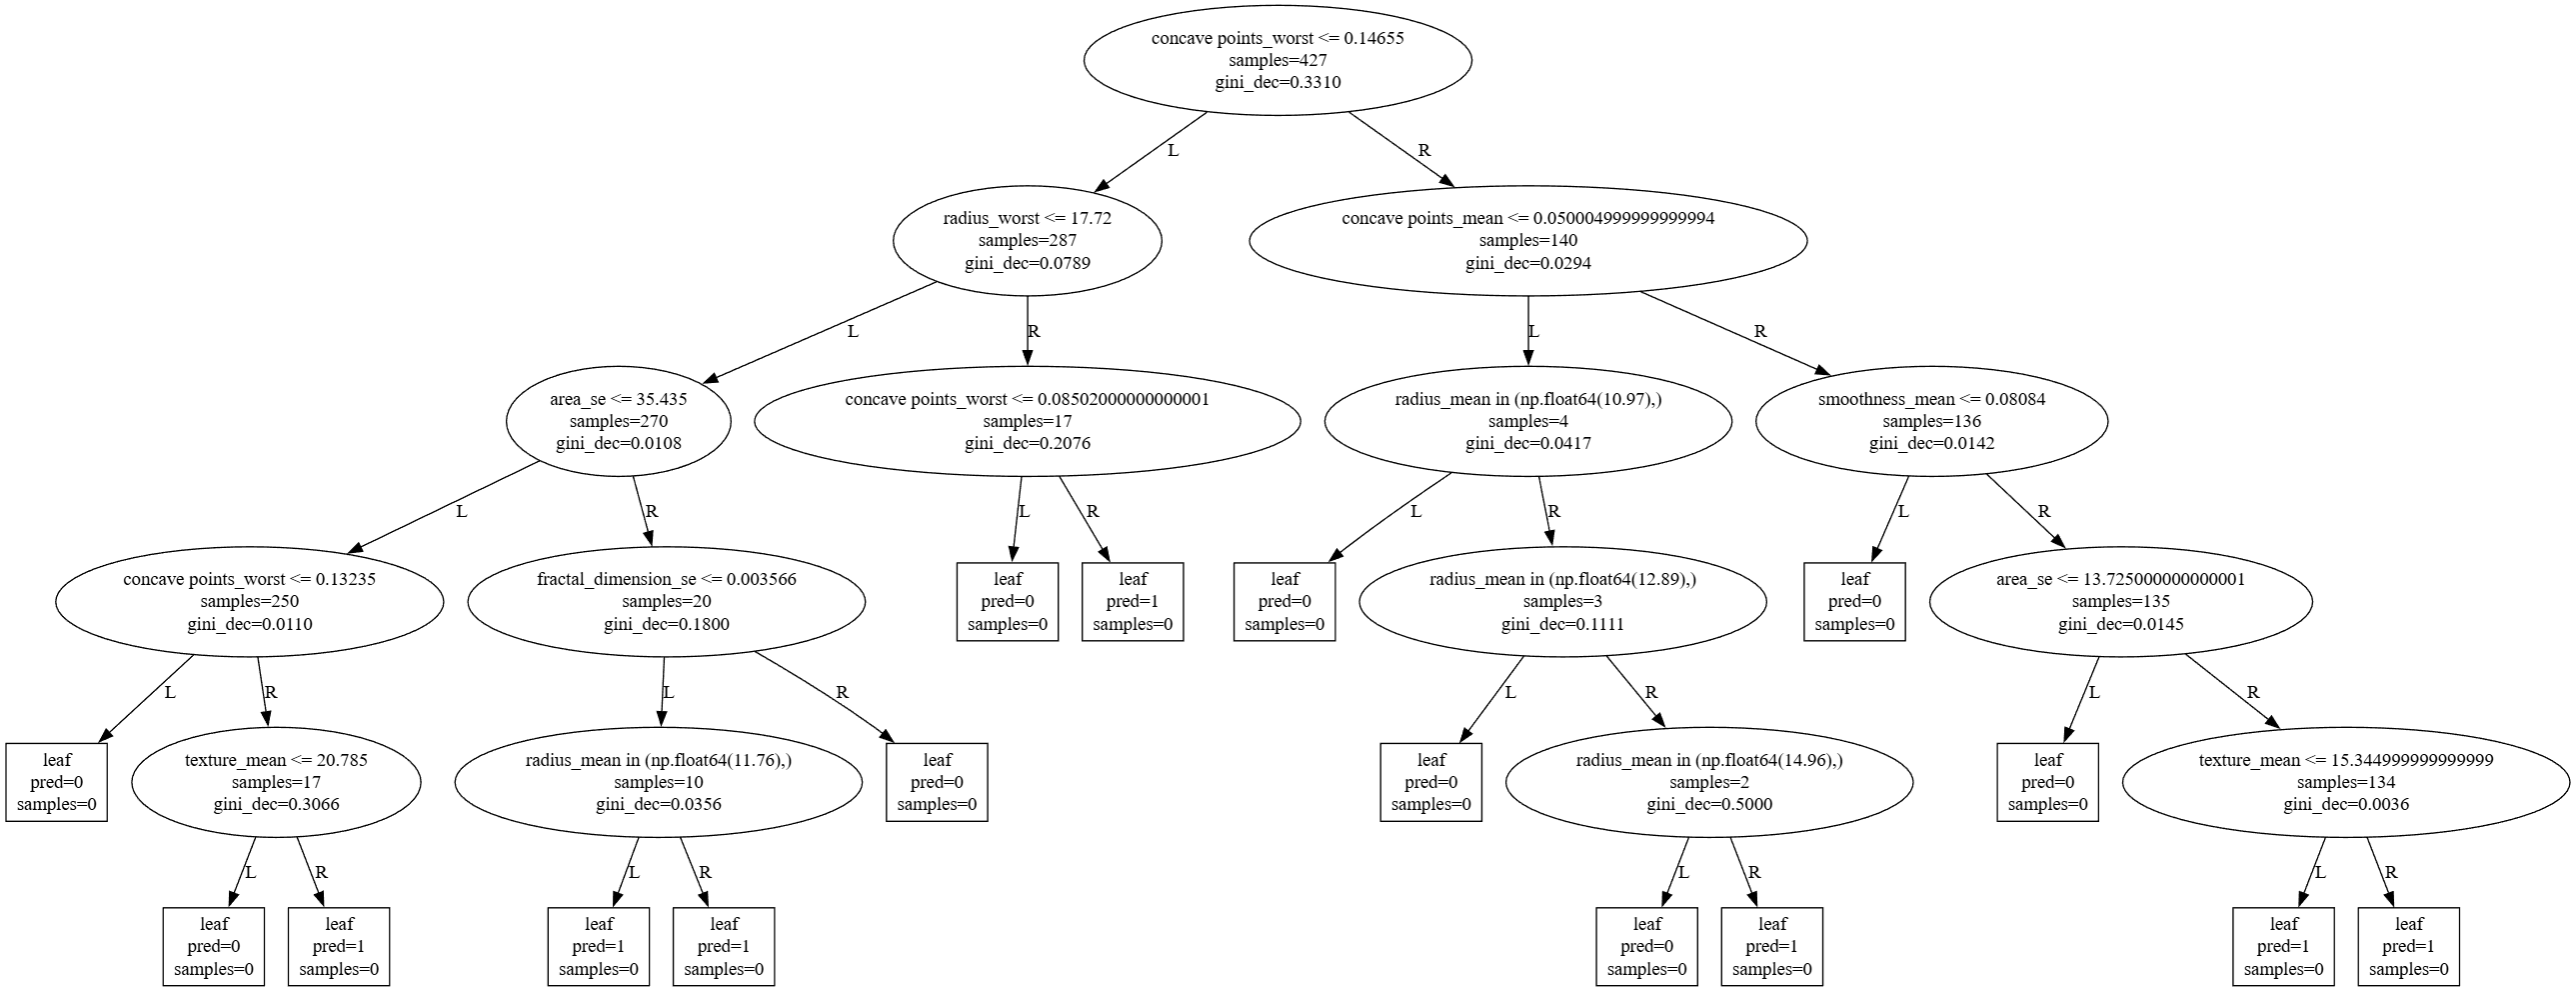

In [18]:
#> --- Displaying the Tree ---

display(Image(filename=r'\results\figures\tree_graphviz.png'))

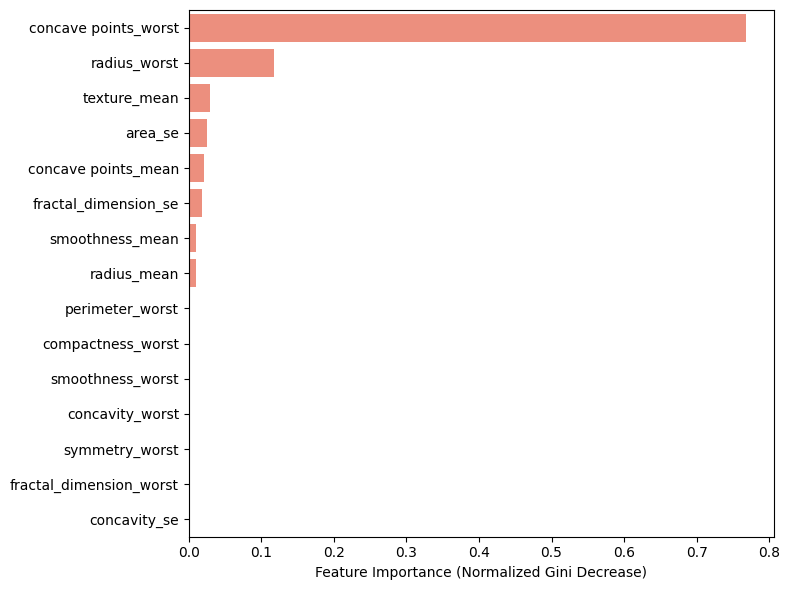

In [19]:
#> --- Feature importance ---
# --------------------------

importances = compute_feature_importance(Tree_Model, n_features=len(feature_names))
plot_feature_importance(importances, feature_names=feature_names, topk=15)

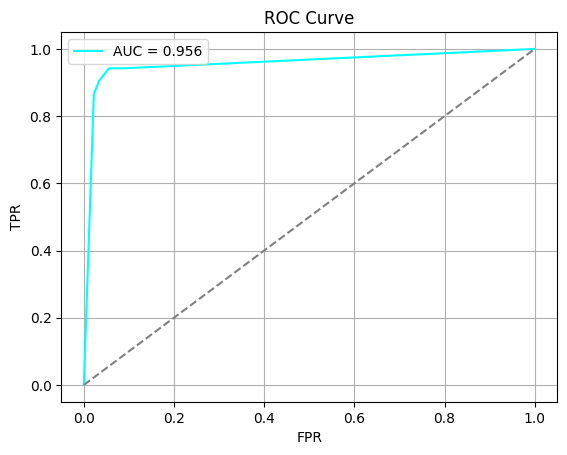

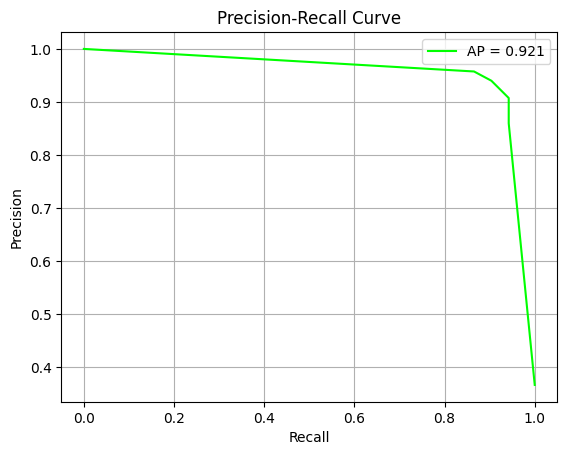

In [20]:
#> --- Assign leaf probabilities using training data (required for ROC/PR) ---
assign_leaf_probas(Tree_Model, X_train, y_train)
y_scores = predict_proba(Tree_Model, X_test)

# 4) ROC/PR
plot_roc_curve(y_test, y_scores)
plot_pr_curve(y_test, y_scores)